### Importing libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import ast


### Loading the dataset

In [73]:
lloyds_users_df = pd.read_csv('SavedData/Lloyds_users.csv')

In [74]:
lloyds_users_df

,user_id,total_tx_count,net_tx_count,total_tx_sum_gbp,net_tx_sum_gbp,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,...,received_tx_mean_gbp,received_tx_median_gbp,user_biz_interaction,user_biz_interaction_frequency,user_user_interaction,user_user_interaction_frequency,user_industry_interaction,user_industry_interaction_frequency,user_date_transaction,user_date_transaction_freq
0,1000,1903,1517,37720.11,19676.91,1710,28698.51,7.854277,4.50,193,...,46.744041,5.5,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","['16354', '18013', '30208', '31489', '36647', ...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[2, 1, 1, 813, 2, 3, 37, 1, 7, 2, 30, 21, 353,...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[5, 5, 13, 6, 2, 9, 5, 8, 6, 5, 5, 7, 4, 7, 2,..."
1,10000,1114,720,21360.39,18944.39,917,20152.39,21.372710,11.00,197,...,6.131980,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","['15896', '28620', '33124', '33732', '34123', ...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Coff...","[1, 23, 34, 23, 1, 51, 2, 1, 14, 312, 119, 3, ...","['01/02/2025', '01/03/2025', '01/04/2025', '01...","[3, 4, 1, 8, 3, 3, 2, 3, 2, 6, 3, 7, 1, 9, 7, ..."
2,100000,1919,1433,23455.27,20720.37,1676,22087.82,11.567202,4.50,243,...,5.627366,6.0,"['ACCESSORY_SHOP', 'A_CAFE', 'A_LOCAL_COFFEE_S...","[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","['12753', '24398', '24951', '28719', '34678', ...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","['Accessories', 'Alcohol', 'Apparel', 'Cafes',...","[15, 6, 1, 828, 10, 58, 5, 2, 18, 1, 334, 65, ...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 3, 10, 2, 3, 12, 5, 6, 3, 3, 3, 3, 4, 6, 1..."
3,100002,1561,1233,22393.96,20303.16,1397,21348.56,13.390346,4.50,164,...,6.374390,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","['10432', '14001', '3296', '37438', '37918', '...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[7, 32, 2, 281, 2, 3, 33, 4, 2, 10, 269, 511, ...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 7, 6, 2, 5, 14, 2, 14, 3, 2, 5, 4, 2, 4, 4..."
4,100019,1157,719,44632.75,16232.85,938,30432.80,20.213062,9.00,219,...,64.839954,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","['22634', '38580', '40565', '44911', '61350', ...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[1, 25, 1, 214, 4, 1, 38, 1, 12, 13, 314, 1, 6...","['01/02/2025', '01/03/2025', '01/06/2025', '01...","[6, 8, 3, 1, 4, 2, 2, 9, 1, 5, 3, 3, 2, 5, 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,1488,1078,20117.08,17723.34,1283,18920.21,14.180119,9.00,205,...,5.838390,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[56, 56, 13, 80, 57, 8, 3, 8, 2, 2, 44, 51, 23...","['15880', '24365', '24475', '2858', '33124', '...","[6, 34, 17, 50, 1, 25, 31, 21, 22, 27, 13, 51,...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[2, 2, 38, 227, 25, 7, 46, 3, 2, 2, 37, 25, 34...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[2, 13, 4, 2, 7, 2, 13, 3, 3, 2, 1, 4, 2, 1, 6..."
8138,99949,1188,818,15007.49,12916.23,1003,13961.86,11.999075,6.00,185,...,5.652054,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[61, 48, 4, 72, 7, 4, 1, 5, 2, 2, 36, 50, 9, 1...","['1697', '32368', '33124', '39937', '52658', '...","[22, 21, 2, 11, 52, 14, 8, 27, 19, 16, 64, 42,...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[3, 3, 2, 215, 1, 4, 22, 1, 3, 25, 1, 368, 23,...","['01/02/2025', '01/03/2025', '01/04/2025', '01...","[2, 11, 1, 2, 8, 2, 7, 1, 3, 1, 2, 14, 

## RFM Analysis

### Creating the columns

To calculate the recency value, I will calculate the days between the first date recorded (01/01/2025) and the user's most recent date of transaction. The Frequency value is from the 'total_tx_count' column, and the Monetary value is from the 'total_tx_sum_gbp' column.

In [75]:
lloyds_users_df['user_date_transaction'] = lloyds_users_df['user_date_transaction'].apply(ast.literal_eval)

# Parse the 'user_date_transaction' column to find the most recent transaction date
lloyds_users_df['most_recent_tx'] = lloyds_users_df['user_date_transaction'].apply(
    lambda dates: max([datetime.strptime(date, '%d/%m/%Y') for date in dates])
)

# Define the reference date (the starting point to calculate recency)
reference_date = datetime.strptime('01/01/2025', '%d/%m/%Y')

# Calculate Recency
lloyds_users_df['Recency'] = (lloyds_users_df['most_recent_tx'] - reference_date).dt.days

# Prepare the new DataFrame for RFM analysis
# Assuming 'total_tx_count' is the Frequency and 'total_tx_sum_gbp' is the Monetary value
rfm_df = lloyds_users_df[['user_id', 'Recency', 'total_tx_count', 'total_tx_sum_gbp']].copy()
rfm_df.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# Placeholder for RFM Score calculation
# You'll need to decide how to score each of the RFM components (Recency, Frequency, Monetary)
# and then calculate the RFM Score based on your business logic or analysis requirements
rfm_df['RFM Score'] = 'To be calculated'  # Update this part with your scoring logic


In [76]:
rfm_df.head(50)

,user_id,Recency,Frequency,Monetary,RFM Score
0,1000,364,1903,37720.11,To be calculated
1,10000,361,1114,21360.39,To be calculated
2,100000,364,1919,23455.27,To be calculated
3,100002,364,1561,22393.96,To be calculated
4,100019,364,1157,44632.75,To be calculated
5,10004,364,1862,18868.67,To be calculated
6,100053,364,1652,40478.88,To be calculated
7,100060,364,1377,19736.97,To be calculated
8,100086,363,1445,22634.20,To be calculated
9,100094,363,694,23390.81,To be calculated


In [77]:
rfm_df.describe()

,user_id,Recency,Frequency,Monetary
count,8142.000000,8142.000000,8142.000000,8142.000000
mean,50826.578605,363.726603,1423.834930,28492.976394
std,28946.392695,0.641999,368.671402,28058.493848
min,1000.000000,360.000000,441.000000,9012.840000
25%,25450.250000,364.000000,1151.000000,18870.995000
50%,50860.500000,364.000000,1344.500000,22311.565000
75%,75606.750000,364.000000,1682.000000,32637.847500
max,100988.000000,364.000000,3417.000000,524178.630000


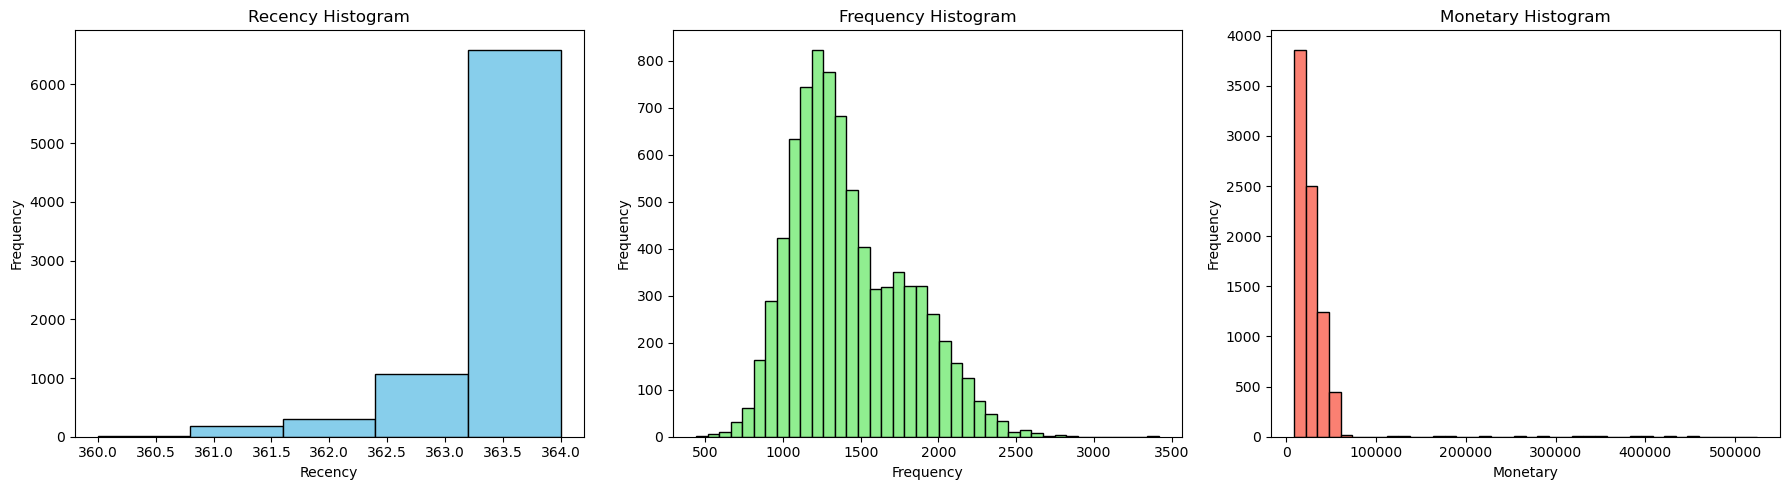

In [78]:
# Create histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Setup a figure with 3 subplots

# Recency Histogram
rfm_df['Recency'].plot(kind='hist', ax=ax[0], bins=5, color='skyblue', edgecolor='black')
ax[0].set_title('Recency Histogram')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Frequency')

# Frequency Histogram
rfm_df['Frequency'].plot(kind='hist', ax=ax[1], bins=40, color='lightgreen', edgecolor='black')
ax[1].set_title('Frequency Histogram')
ax[1].set_xlabel('Frequency')

# Monetary Histogram
rfm_df['Monetary'].plot(kind='hist', ax=ax[2], bins=40, color='salmon', edgecolor='black')
ax[2].set_title('Monetary Histogram')
ax[2].set_xlabel('Monetary')

plt.tight_layout()  # Adjust layout to make room for the titles
plt.show()


There are many ways to calculate the RFM scores. After exploring my data and researching papers on RFM analysis, I decided to use a scale of 1-4 rather than 1-5 (the common way) given there is only 8142 unique customers in the dataset. Moreover, I will be assigning the scores for Frequency and Monetary values through using quartiles, since there is enough variation in the data to be split into 4 groups. However, all unique accounts seemed to have completed transactions in the last 5 days of the year. Therefore, I will assign a highest score of 4 to all of those who spent money on the last day of the year, and give the accounts who spent in the last 5 days of the year a 3. 

In [79]:
rfm_df['R_Score'] = rfm_df['Recency'].apply(lambda x: 4 if x == 364 else (3 if 360 <= x <= 363 else 1))
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Calculate RFM_Score with the adjusted R_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the updated DataFrame to show the adjusted RFM Scores based on the corrected criteria
rfm_df[['user_id', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head(30)


,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1000,364,1903,37720.11,4,4,4,444
1,10000,361,1114,21360.39,3,1,2,312
2,100000,364,1919,23455.27,4,4,3,443
3,100002,364,1561,22393.96,4,3,3,433
4,100019,364,1157,44632.75,4,2,4,424
5,10004,364,1862,18868.67,4,4,1,441
6,100053,364,1652,40478.88,4,3,4,434
7,100060,364,1377,19736.97,4,3,2,432
8,100086,363,1445,22634.20,3,3,3,333
9,100094,363,694,23390.81,3,1,3,313


In [80]:
rfm_score_unique= rfm_df['RFM_Score'].unique()
len(rfm_score_unique)
rfm_score_unique

array(['444', '312', '443', '433', '424', '441', '434', '432', '333',
       '313', '422', '413', '431', '442', '314', '411', '421', '414',
       '423', '321', '323', '412', '334', '311', '322', '324', '332',
       '331', '344', '341', '342', '343'], dtype=object)

### Assigning Segments to RFM scores

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

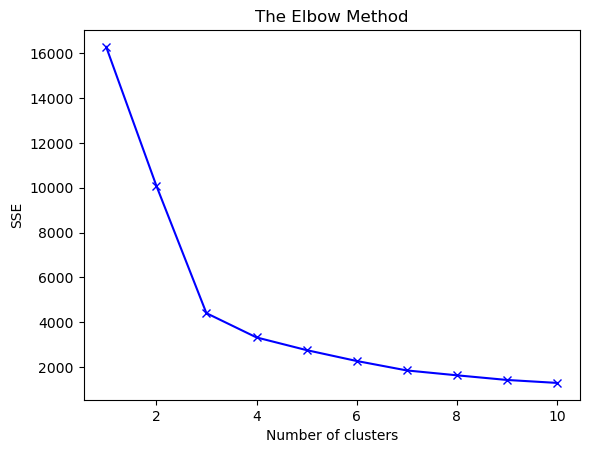

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_56089/2681634012.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_avg = rfm_df.groupby('Cluster').mean()


,user_id,Recency,Frequency,Monetary,RFM Score,R_Score,F_Score,M_Score,RFM_Score,Cluster
0,1000,364,1903,37720.11,To be calculated,4,4,4,444,0
1,10000,361,1114,21360.39,To be calculated,3,1,2,312,2
2,100000,364,1919,23455.27,To be calculated,4,4,3,443,0
3,100002,364,1561,22393.96,To be calculated,4,3,3,433,0
4,100019,364,1157,44632.75,To be calculated,4,2,4,424,2
5,10004,364,1862,18868.67,To be calculated,4,4,1,441,0
6,100053,364,1652,40478.88,To be calculated,4,3,4,434,0
7,100060,364,1377,19736.97,To be calculated,4,3,2,432,2
8,100086,363,1445,22634.20,To be calculated,3,3,3,333,2
9,100094,363,694,23390.81,To be calculated,3,1,3,313,2


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Let's assume you have your RFM DataFrame 'rfm_df' ready

# Step 1: Prepare the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Frequency', 'Monetary']])

# Step 2: Determine the number of clusters using the Elbow Method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_  # Sum of squared distances to closest cluster center

# Find the elbow point in the SSE curve (optional plotting code could be here)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()

# Step 3: Run the K-means algorithm
# Choose the optimal number of clusters 
kmeans = KMeans(n_clusters=3, random_state=1)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 4: Assign clusters
# The 'Cluster' column now represents the segment of each customer

# Step 5: Analyze and label clusters
# Calculate the mean value for RFM for each cluster
cluster_avg = rfm_df.groupby('Cluster').mean()

# Check the segmentation
rfm_df.head(50)


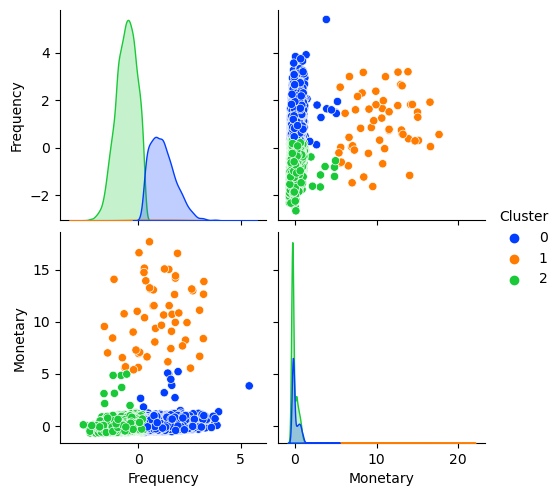

In [89]:
import seaborn as sns
import pandas as pd

# Add the cluster assignments and the scaled RFM values back into the dataframe for plotting
rfm_df_plot = pd.DataFrame(rfm_scaled, columns=['Frequency', 'Monetary'])
rfm_df_plot['Cluster'] = kmeans.labels_

# Use seaborn's pairplot to create pairwise scatter plots
sns.pairplot(rfm_df_plot, hue='Cluster', vars=['Frequency', 'Monetary'], palette='bright')
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd

# Add the cluster assignments and the scaled RFM values back into the dataframe for plotting
rfm_df_plot = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df_plot['Cluster'] = kmeans.labels_

# Use seaborn's pairplot to create pairwise scatter plots
sns.pairplot(rfm_df_plot, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='bright')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to the scaled RFM data
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Plot the resulting principal components in a 2D scatter plot
plt.figure(figsize=(10, 8))
for i in range(kmeans.n_clusters):
    plt.scatter(rfm_pca[rfm_df['Cluster'] == i][:, 0], rfm_pca[rfm_df['Cluster'] == i][:, 1], label=f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('RFM Clusters after PCA')
plt.show()
